In [1]:
import sys
import os


notebook_path = os.getcwd()
sys.path.append(os.path.join(notebook_path, '..', 'src'))


from controlGUI import ple, pl, live, GUI, LaserStabilizer, VirtualLaserStabilizerCore, change_to_inline
from virtual_device import VirtualScanner, virtual_read_counts
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
# initialize all classes and functions, bind them to devices wanted

config = {
    
    "scanner": {
        "type": "VirtualScanner",
    },
    
    "counter": {
        "type": "virtual_read_counts",
    },
    
    "laser_stabilizer_core": {
        "type": "VirtualLaserStabilizerCore",
        'config_instances':'config_instances'
    },
    
    "laser_stabilizer": {
        "type": "LaserStabilizer",
        'config_instances':'config_instances'
    },
    
    
}

def initialize_classes(config):
    instances = {}
    
    for key, params in config.items():
        if 'config_instances' not in params:
            type_name = params.pop('type')
            class_or_func = globals()[type_name]
            
            if callable(class_or_func):
                if hasattr(class_or_func, '__call__') and not hasattr(class_or_func, '__bases__'):
                    instances[key] = class_or_func
                else:
                    instances[key] = class_or_func(**params)

    for key, params in config.items():
        if 'config_instances' in params:
            type_name = params.pop('type')
            class_or_func = globals()[type_name]
            params.pop('config_instances')  # Remove the config_instances key
            instances[key] = class_or_func(instances, **params)
    
    return instances



config_instances = initialize_classes(config)
print(config_instances)


{'scanner': <virtual_device.VirtualScanner object at 0x000001F05A4A1E88>, 'counter': <function virtual_read_counts at 0x000001F041F95C18>, 'laser_stabilizer_core': <controlGUI.VirtualLaserStabilizerCore object at 0x000001F03FE52848>, 'laser_stabilizer': <LaserStabilizer(Thread-8, initial daemon)>}


In [3]:
help(ple)

Help on function ple in module controlGUI:

ple(wavelength_array, exposure, config_instances)
    The function plots PLE 
    
    Parameters
    ----------
    wavelength_array : array
        array for wavelength to be used in PLE
    exposure : float
        exposure time in seconds
    
    Returns
    -------
    data_x, data_y, fig, axes
        returns handle to fig and data which enables more operations such as curve fit
    
    Examples
    --------
    >>> data_x, data_y, fig, axes = ple(np.linspace(759.1-0.005,759.1+0.005,30), exposure=0.1)



<IPython.core.display.Javascript object>


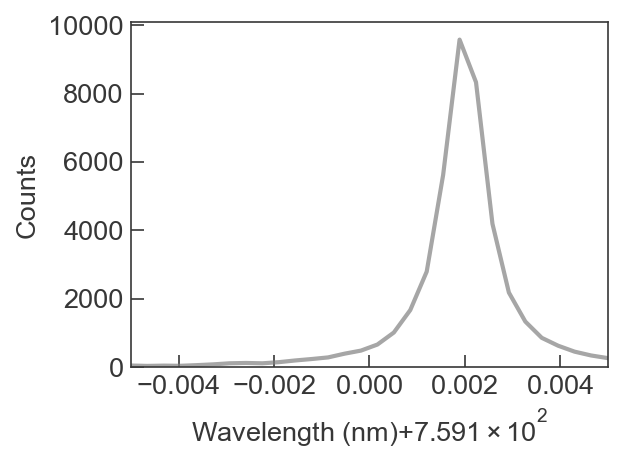

In [4]:
ple_test_dict = {'ple_height':100000, 'ple_width':0.001, 'ple_center':759.102}
data_x, data_y, fig, axes, selector = ple(np.linspace(759.1-0.005,759.1+0.005,30), exposure=0.1, \
                                config_instances={**config_instances, **ple_test_dict})

In [11]:
help(pl)

Help on function pl in module controlGUI:

pl(center, coordinates_x, coordinates_y, exposure, config_instances, wavelength=None)
    The function plots PL
    
    Parameters
    ----------
    center : array
        [x, y] of center of scan 
    coordinates_x : array
        array of x coordinates
    coordinates_y : array
        array of y coordinates
    exposure : float
        exposure time in seconds
    wavelength=None : float
        set the wavelength of laser during PL
    
    Returns
    -------
    data_x, data_y, fig, axes
        returns handle to fig and data which enables more operations such as curve fit
    
    Examples
    --------
    >>> pl(center=[0, 0], coordinates_x=np.linspace(-5,5,10),
        coordinates_y=np.linspace(-5,5,10), exposure=0.2)



<IPython.core.display.Javascript object>


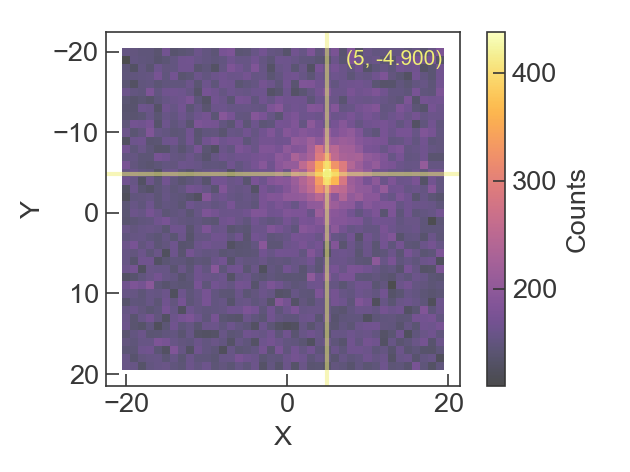

In [12]:
pl_test_dict = {'pl_height':10000, 'pl_width':4, 'pl_center':[5, -5], 'pl_bg':5000}
data_x, data_y, fig, axes, selector = pl(center=[0,0], coordinates_x=np.arange(-20,20,1), \
                               coordinates_y=np.arange(-20,20,1), exposure=0.03, \
                               config_instances={**config_instances, **pl_test_dict})

In [6]:
a = {'a':1}
a.get('a')

1

<IPython.core.display.Javascript object>


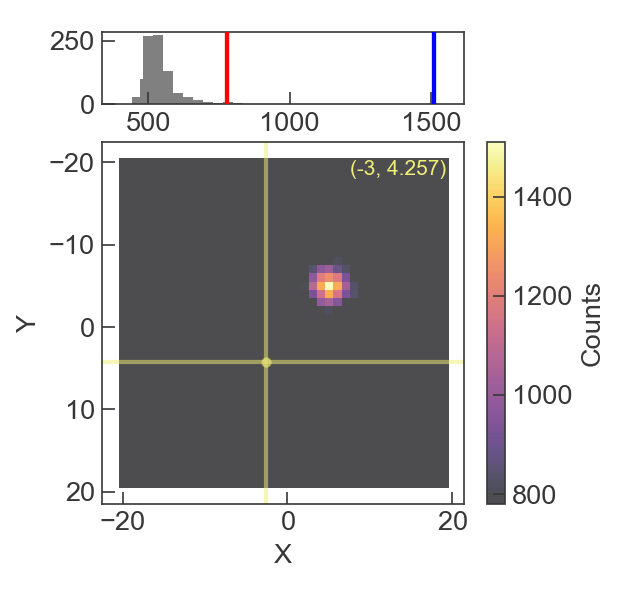

In [4]:
pl_test_dict = {'pl_height':10000, 'pl_width':4, 'pl_center':[5, -5], 'pl_bg':5000}
data_x, data_y, fig, axes, selector = pl(center=[0,0], coordinates_x=np.arange(-20,20,1), \
                               coordinates_y=np.arange(-20,20,1), exposure=0.1, is_dis=True,\
                               wavelength = 2, config_instances={**config_instances, **pl_test_dict})

In [3]:
help(live)

Help on function live in module controlGUI:

live(data_array, exposure, config_instances, wavelength=None, is_finite=False)
    The function plots live counts
    
    Parameters
    ----------
    data_array : array
        defines how many data points will be displayed 
    exposure : float
        exposure time in seconds
    wavelength=None : float
        set the wavelength of laser during live counts
    is_finite=False : Bool
        if is_finite, live counts will end after fill out the window
    
    Returns
    -------
    data_x, data_y, fig, axes
        returns handle to fig and data which enables more operations such as curve fit
    Or interrupt by Keyboard
    
    Examples
    --------
    >>> data_x, data_y, fig, axes = live(np.arange(100), exposure=0.1)



<IPython.core.display.Javascript object>


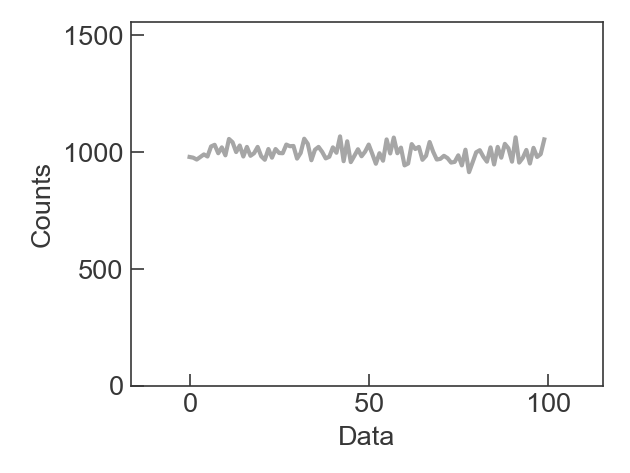

In [5]:
data_x, data_y, fig, axes, selector = live(np.arange(100), exposure=0.1, wavelength=None, 
                                           is_finite=True, config_instances=config_instances)

<IPython.core.display.Javascript object>


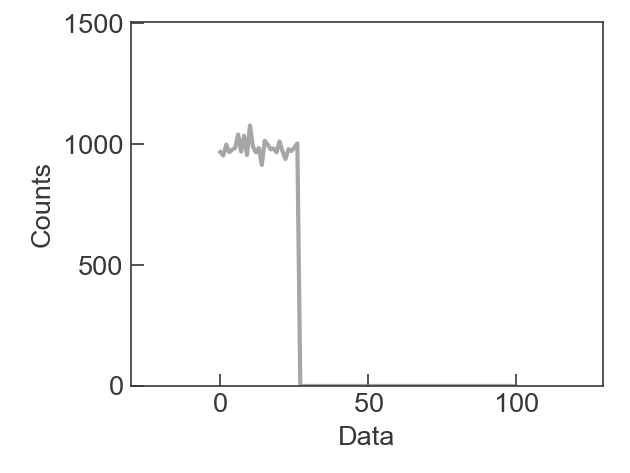

In [6]:
data_x, data_y, fig, axes, selector = live(np.arange(100), exposure=0.1, config_instances=config_instances)

In [10]:
help(GUI)

Help on function GUI in module controlGUI:

GUI()
    The function opens pyqt GUI for PLE, PL, live counts, and pulse control.
    Save button will also output data and figure to jupyter notebook.
    
    Examples
    --------
    >>> GUI()



In [11]:
GUI()

Text(0, 0.5, 'y')

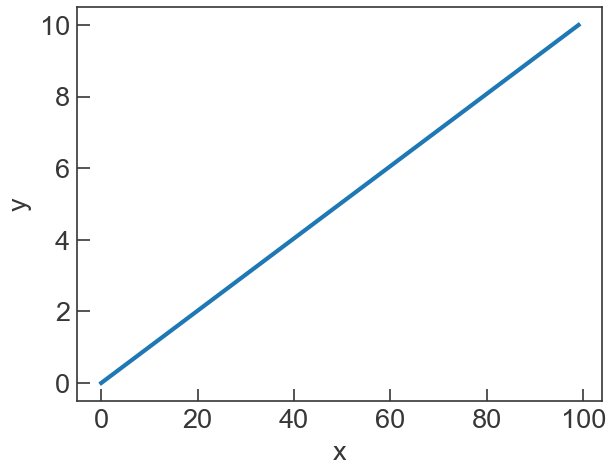

In [5]:
change_to_inline() #otherwise display error
plt.close()
plt.tight_layout()
plt.plot(np.linspace(0, 10, 100))
plt.xlabel('x')
plt.ylabel('y')